In [2]:
import torch
import pandas as pd
import numpy as np
import torchvision
import PIL
from PIL import Image


In [4]:
from src.utils.dataset import get_dataloader

dl, vocab = get_dataloader('data/train_filter.lst', 'data/images_processed/', 'data/formulas_tokenized.lst', 'data/latex_vocab.txt')

In [5]:
%%time
for b in dl:
    batch = b
    break
batch['img']

CPU times: user 16.3 ms, sys: 9.63 ms, total: 26 ms
Wall time: 54.2 ms


tensor([[[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]]])

In [6]:
%%time
from src.model.model import AttentionOCR

model = AttentionOCR(len(dl.dataset.vocab))
res = model(batch)
res.shape

CPU times: user 5.74 s, sys: 1.1 s, total: 6.84 s
Wall time: 5.45 s


torch.Size([96, 562])

In [8]:
img = Image.open('../main_data/example2.png').convert('L')
# img = img.resize((img.size[0] // 2, img.size[1] // 2), Image.LANCZOS)
type(img)

PIL.Image.Image

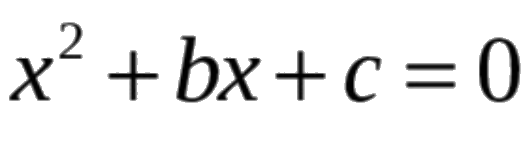

In [11]:
img_np = np.array(img)
img_np[img_np > 196] = 255
# img_np[img_np < 106] = 0
Image.fromarray(img_np)

In [12]:
from torchvision.transforms import Normalize, ToTensor, Compose

trans = Compose([ToTensor()])
ten = trans(Image.fromarray(img_np))
ten

tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])

In [19]:
(torch.Tensor(img_np) / 255 == ten).all()

tensor(True)

In [34]:
torch.argmax(torch.tensor([[1, 2], [4, 3]]), 1)

tensor([1, 0])

In [20]:
dl.dataset.data

,image,idx
0,<PIL.Image.Image image mode=L size=1000x200 at...,1
1,<PIL.Image.Image image mode=L size=400x100 at ...,2
2,<PIL.Image.Image image mode=L size=480x80 at 0...,3
3,<PIL.Image.Image image mode=L size=560x80 at 0...,4
4,<PIL.Image.Image image mode=L size=720x120 at ...,5
...,...,...
4995,<PIL.Image.Image image mode=L size=560x80 at 0...,6344
4996,<PIL.Image.Image image mode=L size=240x100 at ...,6345
4997,<PIL.Image.Image image mode=L size=1000x200 at...,6346
4998,<PIL.Image.Image image mode=L size=800x100 at ...,6347


In [71]:
from nltk.translate import bleu_score
bleu_score.sentence_bleu([np.array([1, 2])], np.array([1, 2, 4]), (1,))

0.6666666666666666